In [77]:
#importando as biblioteca necessárias para a análise
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns

C:\Users\Filipe\AppData\Local\Temp/ipykernel_69336/1094541302.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
#importando o dataframe que iremos analisar
df = pd.read_csv("churn.csv", index_col='RowNumber')

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Primeiro vamos verificar informações importantes do nosso dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


### Podemos verificar que não existem valores nulos em nosso dataframe, todos as 10 mil entradas estão devidamente preenchidas com algum valor.
### Um resumo do que elas signficam:

CustomerId: identificação do cliente.

Surname: sobrenome do cliente.

CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência.

Geography: país que o serviço é oferecido.

Gender: sexo do cliente.

Age: idade do cleinte.

Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.

Balance: saldo da conta corrente.

NumOfProducts: número de produtos bancários adquiridos.

HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0).

IsActiveMember: se é um cliente com conta ativa, (Ativo = 1).

EstimatedSalary: salário estimado.

Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).

Como informado na introdução desse relatório, nossa análise busca entender o perfil dos clientes que deixaram o banco, para isso vamos filtrar nosso dataframe, retornando apenas clientes que saíram(Exited  = 1)
Para isso vamos utilizar o método query.

In [8]:
#Retornar todas pessoas que deixaram de ser clientes
df.query('Exited == 1')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


Podemos perceber que as pessoas que deixaram de ser clientes representam pouco mais de 20% do nosso dataframe.
Como o foco da análise são os clientes que saíram(exited = 1), vou definir um novo dataframe com o nome df_churn apenas com esse filtro.

In [10]:
df_churn = df.query('Exited == 1')
df_churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


A partir de agora vamos trabalhar com o dataframe acima

In [11]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 1 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       2037 non-null   int64  
 1   Surname          2037 non-null   object 
 2   CreditScore      2037 non-null   int64  
 3   Geography        2037 non-null   object 
 4   Gender           2037 non-null   object 
 5   Age              2037 non-null   int64  
 6   Tenure           2037 non-null   int64  
 7   Balance          2037 non-null   float64
 8   NumOfProducts    2037 non-null   int64  
 9   HasCrCard        2037 non-null   int64  
 10  IsActiveMember   2037 non-null   int64  
 11  EstimatedSalary  2037 non-null   float64
 12  Exited           2037 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 222.8+ KB


Com essas informações preliminares, vamos organizar os dados, separando as variáveis qualitativas e quantitativas.
Iremos apagar a coluna CustomerID que é apenas uma identificação do cliente, o RowNumber já está servindo como nosso indexador, e também vou apagar o Surname, que propriamente dito é o sobrenome do cliente.

In [12]:
#criando uma lista com as colunas que iremos deletar e deletando as mesmas em seguida

arr_delete = ['CustomerId', 'Surname']

df_churn.drop(arr_delete, axis=1, inplace = True)


#Criando listas com o nome de cada coluna

arr_quali = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
arr_quanti = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

#criando novos dataframes com base nas listas.
df_churn_quali = df_churn[arr_quali]
df_churn_quanti = df_churn[arr_quanti]

C:\Users\Filipe\AppData\Local\Temp/ipykernel_69336/3519490126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn.drop(arr_delete, axis=1, inplace = True)


Vamos analisar algumas métricas estatísticas com nossas variáveis quantitativas

In [21]:
df_churn_quanti.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,2037.00,2037.00,2037.00,2037.00,2037.00,2037.00,2037.0
mean,645.35,44.84,4.93,91108.54,1.48,101465.68,1.0
std,100.32,9.76,2.94,58360.79,0.80,57912.42,0.0
min,350.00,18.00,0.00,0.00,1.00,11.58,1.0
25%,578.00,38.00,2.00,38340.02,1.00,51907.72,1.0
50%,646.00,45.00,5.00,109349.29,1.00,102460.84,1.0
75%,716.00,51.00,8.00,131433.33,2.00,152422.91,1.0
max,850.00,84.00,10.00,250898.09,4.00,199808.10,1.0


### Alguns dados relevantes:
Média de idade bem próxima a mediana, baixa assimetria nessa variável(Média: 44.8 Mediana 45.0).
Clientes que variam de 18 a 84 anos (A variável Age pode ser convertida para qualitativa, caso seja necessário criar um faixa de idade).
Desvio padrão do salário(EstimatedSalary) relativamente alto, o que pode ser comum em uma carteira de clientes bancários.



In [28]:
#Clientes que saíram e que possuem idade acima da média arredondada(45)
df_churn_quanti.query('Age > 45')

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
RowNumber,,,,,,,
17,653,58,1,132602.88,1,5097.67,1
36,475,45,0,134264.04,1,27822.99,1
42,465,51,8,122522.32,1,181297.65,1
44,834,49,2,131394.56,1,194365.76,1
59,511,66,4,0.00,1,1643.11,1
...,...,...,...,...,...,...,...
9925,632,50,5,107959.39,1,6985.34,1
9957,520,46,10,85216.61,1,117369.52,1
9976,610,50,1,113957.01,2,196526.55,1


In [29]:
#Clientes que saíram e que possuem idade abaixo da média(45)
df_churn_quanti.query('Age < 45')

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
RowNumber,,,,,,,
1,619,42,2,0.00,1,101348.88,1
3,502,42,8,159660.80,3,113931.57,1
6,645,44,8,113755.78,2,149756.71,1
8,376,29,4,115046.74,4,119346.88,1
23,510,38,4,0.00,1,118913.53,1
...,...,...,...,...,...,...,...
9961,795,33,9,104552.72,1,120853.83,1
9963,702,44,9,0.00,1,59207.41,1
9982,498,42,3,152039.70,1,53445.17,1


In [34]:
#vamos analisar os jovens
df_churn_quanti.query('Age > 17 & Age < 30') 

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
RowNumber,,,,,,,
8,376,29,4,115046.74,4,119346.88,1
47,829,27,9,112045.67,1,119708.21,1
87,750,22,3,121681.82,1,128643.35,1
115,721,28,9,154475.54,2,101300.94,1
165,683,29,0,133702.89,1,55582.54,1
...,...,...,...,...,...,...,...
9540,659,29,6,123192.12,1,56971.41,1
9555,779,29,3,46388.16,3,127939.26,1
9573,644,18,7,0.00,1,59645.24,1


Podemos perceber que os jovens representam uma infíma parcela dos antigos clientes do banco, 124 registros, aproximadamente 6%.
Podemos visualizar um gráfico com a quantidade por idade

<Figure size 900x400 with 0 Axes>

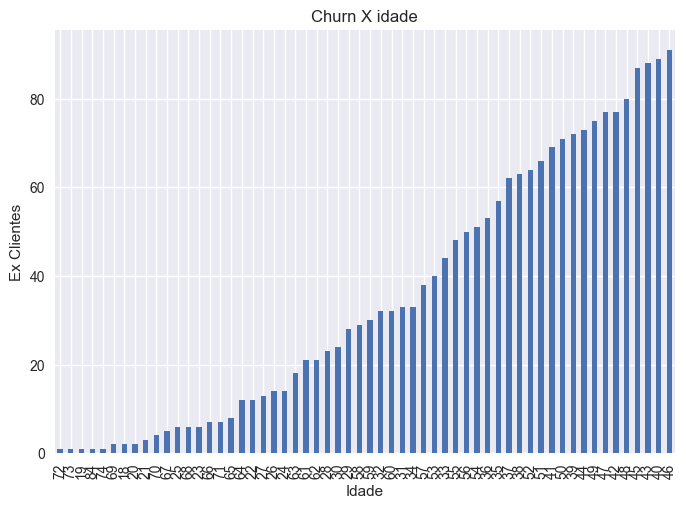

<Figure size 900x400 with 0 Axes>

In [89]:
df_churn_quanti["Age"].value_counts().sort_values(ascending=True).plot.bar()
plt.title("Churn X idade")
plt.xlabel("Idade")
plt.ylabel("Ex Clientes")
plt.figure(figsize=(9, 4))

Podemos notar que a maioria está na faixa dos 30 a 50 anos

Vamos retornar para o nosso dataframe principal e realizar algumas análises.
Para isso vamos exibir uma amostra

In [84]:
df_churn.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
23,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
9810,820,France,Female,39,1,104614.29,1,1,0,61538.43,1
5025,745,Germany,Female,44,0,119638.21,1,1,1,34265.08,1
6506,596,Germany,Male,48,2,131326.47,1,0,0,1140.02,1
82,777,France,Female,32,2,0.00,1,1,0,136458.19,1
1952,604,France,Male,53,8,144453.75,1,1,0,190998.96,1
2345,714,Germany,Female,49,4,93059.34,1,1,0,7571.51,1
9749,627,Germany,Male,24,5,102773.20,2,1,0,56793.02,1
4893,707,Germany,Female,51,10,98438.23,1,0,0,70778.63,1


In [92]:
#quantidade de ex clientes por País
df_churn.Geography.value_counts()


Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

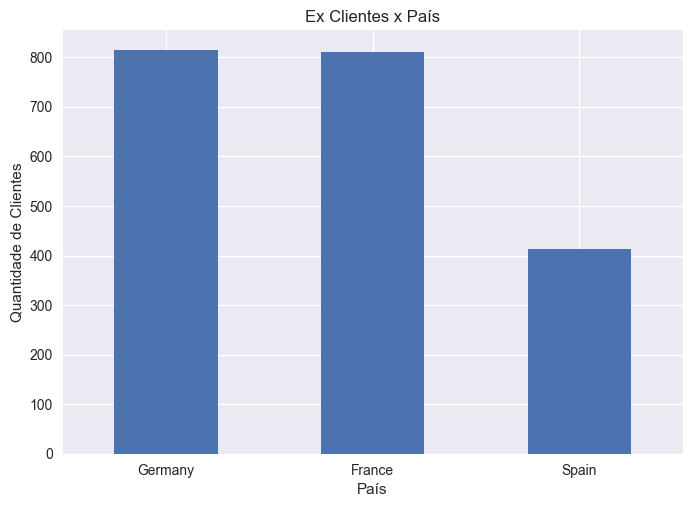

In [105]:
#visualizando esses dados em gráficos de barra
df_churn.Geography.value_counts().plot.bar()
plt.title('Ex Clientes x País')
plt.xlabel('País')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation = 'horizontal');

Sabemos que mais da metade dos ex clientes são Alemães ou Franceses, vamos analisar as médias salariais por países

In [103]:
#Medias salariais por país
pd.options.display.float_format = '{:,.2f}'.format
round(df_churn.groupby("Geography")["EstimatedSalary"].mean(), 2)

Geography
France    103,439.28
Germany    98,403.89
Spain     103,629.55
Name: EstimatedSalary, dtype: float64

<AxesSubplot: ylabel='Geography'>

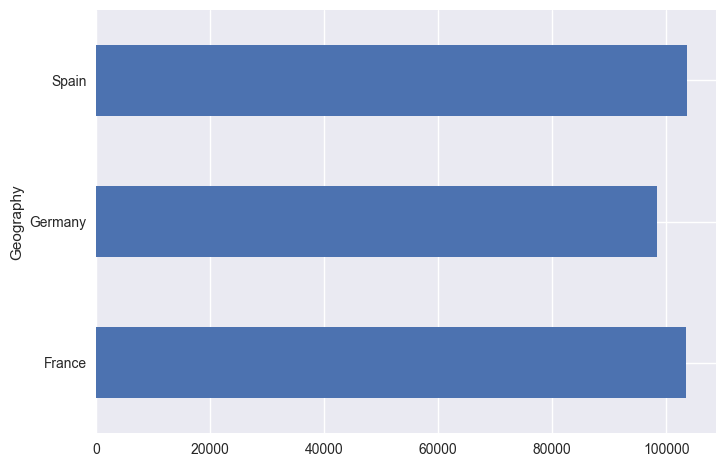

In [107]:
round(df_churn.groupby("Geography")["EstimatedSalary"].mean(), 2).plot.barh();

Algumas métricas estátisticas gerais de salário

In [111]:
df_churn.EstimatedSalary.describe().round(2)

count     2,037.00
mean    101,465.68
std      57,912.42
min          11.58
25%      51,907.72
50%     102,460.84
75%     152,422.91
max     199,808.10
Name: EstimatedSalary, dtype: float64

25% ganham aproximadamente até 51.907 mil euros por ano
50% ganham aproximadamente até 102.460 mil euros por ano
Média está bem próxima da mediana 101.4 e 102.4 respectivamente.
Valor mínimo está bem destoante.

In [112]:
#Ex cliente com o salário estimado mais baixo
df_churn.query('EstimatedSalary == 11.58')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
2363,709,Germany,Male,45,4,"122,917.71",1,1,1,11.58,1


Esse valor corrobora para que a média salarial da alemanha seja menor que as demais, ainda assim mantendo um nível bem próximo da média geral.
Agora vamos verificar como estava o índicativo de estabilidade no emprego(Tenure)

In [126]:
#média de Tenure
round(df_churn.Tenure.mean(),0)

5.0

In [128]:
#Ex clientes com indíce de estabilidade maior que a média
df_churn.query('Tenure > 5')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
3,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
6,645,Spain,Male,44,8,"113,755.78",2,1,0,"149,756.71",1
42,465,France,Female,51,8,"122,522.32",1,0,0,"181,297.65",1
47,829,Germany,Female,27,9,"112,045.67",1,1,1,"119,708.21",1
48,637,Germany,Female,39,9,"137,843.80",1,1,1,"117,622.80",1
...,...,...,...,...,...,...,...,...,...,...,...
9957,520,France,Female,46,10,"85,216.61",1,1,0,"117,369.52",1
9961,795,Germany,Female,33,9,"104,552.72",1,1,1,"120,853.83",1
9963,702,Spain,Male,44,9,0.00,1,0,0,"59,207.41",1


In [137]:
#Ex clientes com indíce de estabilidade igual ou menor que a média
df_churn.query('Tenure <= 5')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
8,376,Germany,Female,29,4,"115,046.74",4,1,0,"119,346.88",1
17,653,Germany,Male,58,1,"132,602.88",1,1,0,"5,097.67",1
23,510,Spain,Female,38,4,0.00,1,1,0,"118,913.53",1
31,591,Spain,Female,39,3,0.00,3,1,0,"140,469.38",1
...,...,...,...,...,...,...,...,...,...,...,...
9948,615,France,Male,34,1,"83,503.11",2,1,1,"73,124.53",1
9976,610,Germany,Male,50,1,"113,957.01",2,1,0,"196,526.55",1
9982,498,Germany,Male,42,3,"152,039.70",1,1,1,"53,445.17",1


Mais da metade dos ex clientes possui tenure igual ou menor a média.

In [130]:
array_1 = ['Tenure', 'EstimatedSalary']
df_churn_correlacao = df_churn[array_1]


In [135]:
#Podemos notar uma correlação moderada entre o Tenure e salário
df_churn_correlacao.corr(method ='pearson')

,Tenure,EstimatedSalary
Tenure,1.00,0.05
EstimatedSalary,0.05,1.00


Vamos analisar o sexo dos ex clientes

In [141]:
#média de salarial por sexo:
round(df_churn.groupby("Gender")["EstimatedSalary"].mean(), 2)

Gender
Female   102,948.99
Male      99,584.29
Name: EstimatedSalary, dtype: float64

Podemos notar que o público feminino tem a média salarial maior.
Vamos verificar a quantidade de homens e mulheres por país

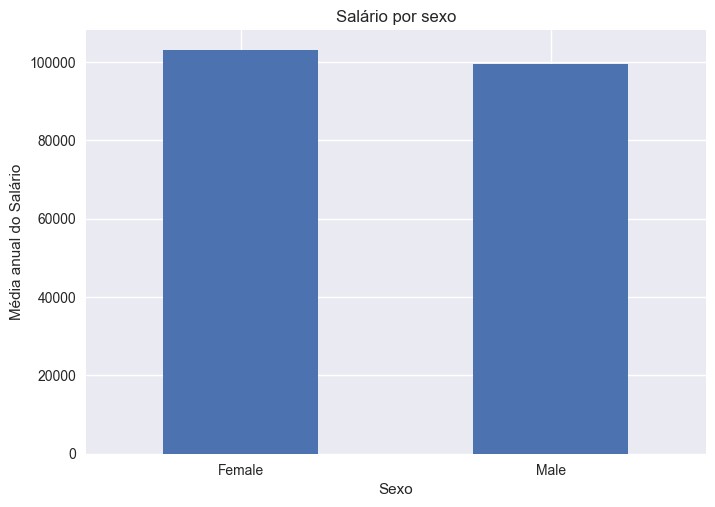

In [156]:
df_churn.groupby("Gender")["EstimatedSalary"].mean().plot.bar()
plt.title('Salário por sexo')
plt.xlabel('Sexo')
plt.ylabel('Média anual do Salário')
plt.xticks(rotation = 'horizontal');

In [150]:
df_churn.groupby("Geography")["Gender"].value_counts()

Geography  Gender
France     Female    460
           Male      350
Germany    Female    448
           Male      366
Spain      Female    231
           Male      182
Name: Gender, dtype: int64

Text(0, 0.5, 'País, sexo')

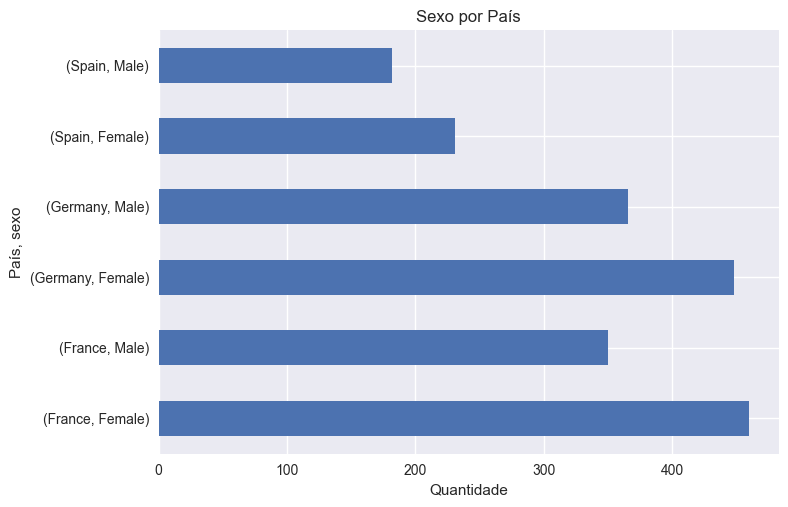

In [146]:
df_churn.groupby("Geography")["Gender"].value_counts().plot.barh();
plt.title('Sexo por País')
plt.xlabel('Quantidade')
plt.ylabel('País, sexo')

Em contrapartida, os homens possuem mais saldo em conta na média

In [158]:
#Média de saldo em conta por sexo
df_churn.groupby("Gender")["Balance"].mean()

Gender
Female   89,036.64
Male     93,736.48
Name: Balance, dtype: float64

In [159]:
df_churn.groupby("Tenure")["Balance"].mean()

Tenure
0    96,054.89
1    89,843.92
2    84,357.17
3    90,152.44
4    87,977.83
5    92,446.42
6    88,239.35
7    92,309.93
8    98,057.32
9    97,156.67
10   85,491.04
Name: Balance, dtype: float64

Podemos perceber que o nível de estabilidade não é a causa de ter um saldo em conta maior, ex clientes com tenure abaixo da média possuíam saldos parecidos ao de clientes com tenure mais elevado.

Text(0.5, 0, 'Saldo')

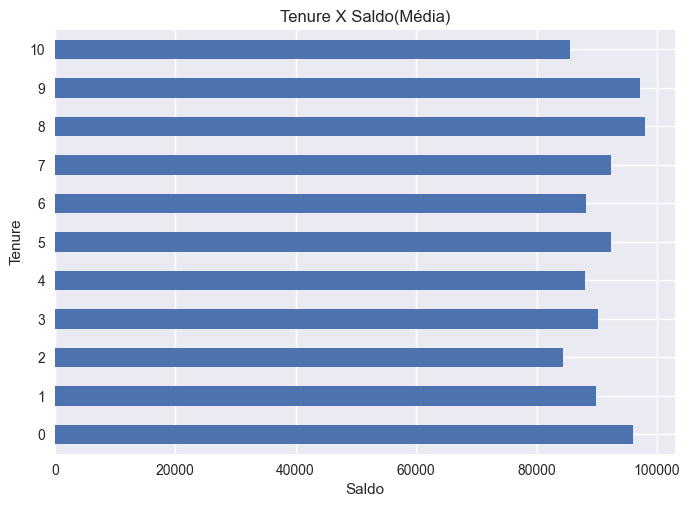

In [162]:
df_churn.groupby("Tenure")["Balance"].mean().plot.barh()
plt.title('Tenure X Saldo(Média)')
plt.xlabel("Saldo")

Muito mais pode ser analisando, mas com essa curta análise, podemos identificar que o perfil do cliente que deixou o banco é em sua maioria do sexo feminino, franceses e alemães, de média salaria acima dos 100 mil por ano e em sua maioria acima dos 30 anos.